In [2]:
import os
import pandas as pd
import numpy as np

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read results

In [15]:

logs_dir = './logs/modeldata'
all_files = os.listdir(logs_dir)

csv_files = [file for file in all_files ]

print(csv_files)
csv_files=csv_files[:2]
#csv_files=[csv_files[0],csv_files[-1]]
print(csv_files)


['_March21_10_50_01_.csv', '_April04_17_16_55_.csv', '_March29_18_58_37_.csv']
['_March21_10_50_01_.csv', '_April04_17_16_55_.csv']


# Box plot

In [16]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(logs_dir, file)
    print(file_path)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)
print(df)

./logs/modeldata/_March21_10_50_01_.csv
./logs/modeldata/_April04_17_16_55_.csv
     test accuracy    recall  precision  trainingset_size             type  \
0        73.400000  0.294872   0.666667               500  active learning   
1        80.500000  0.413462   0.914894              1000  active learning   
2        82.800000  0.551282   0.843137              1500  active learning   
3        85.700000  0.615385   0.893023              2000  active learning   
4        85.500000  0.657051   0.843621              2500  active learning   
..             ...       ...        ...               ...              ...   
365      86.342857  0.656130   0.851990              3000  active learning   
366      85.828571  0.618774   0.868280              3500  active learning   
367      86.514286  0.695402   0.825000              4000  active learning   
368      87.314286  0.681992   0.864078              4500  active learning   
369      87.428571  0.679119   0.871007              5000  act

# Influence model architecture

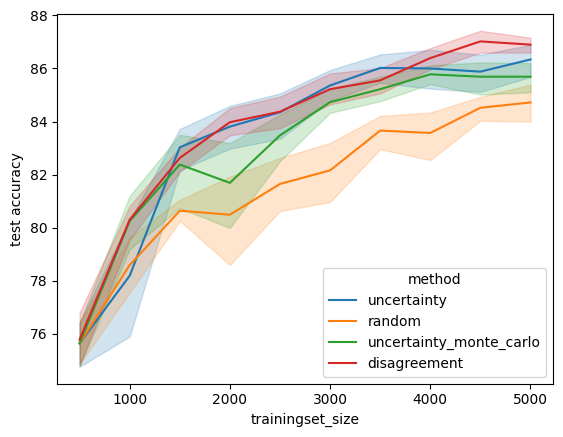

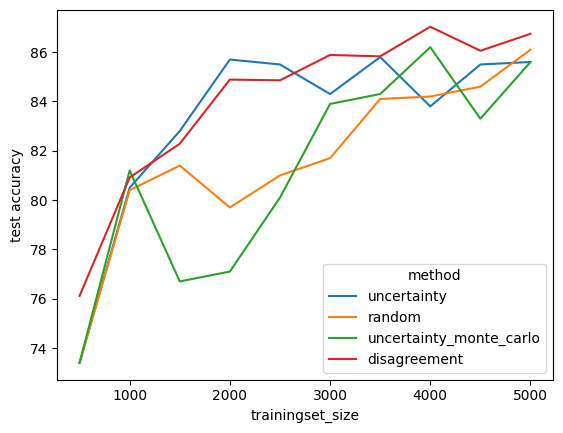

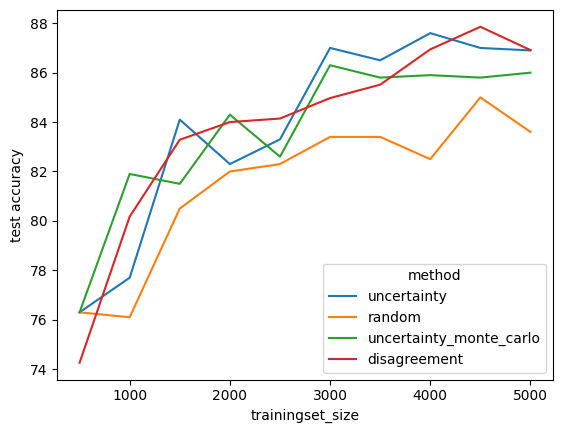

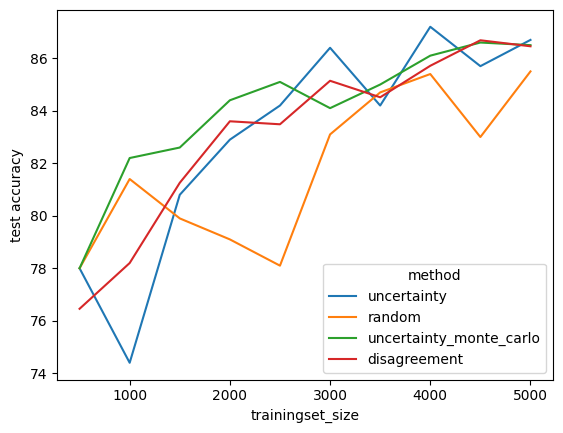

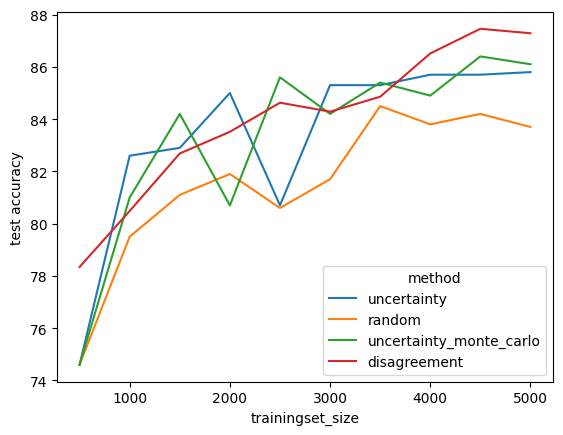

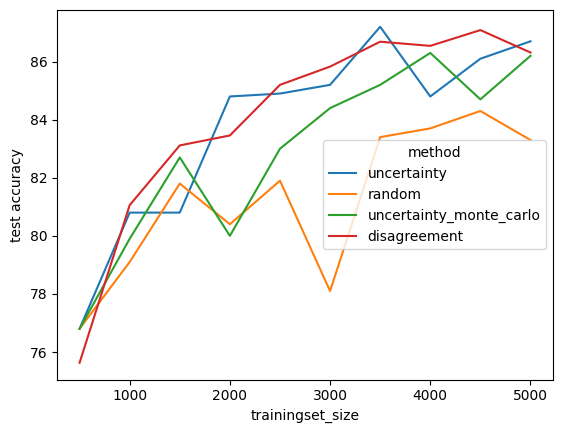

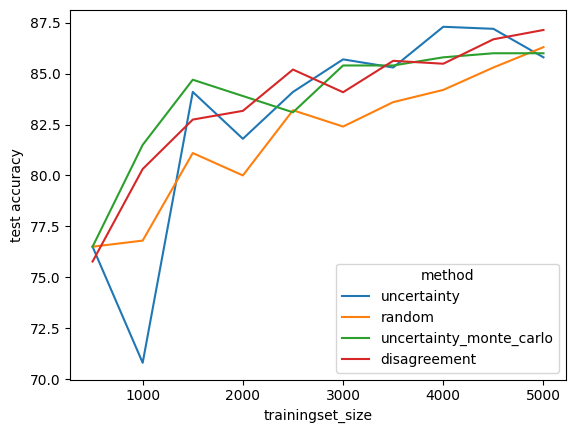

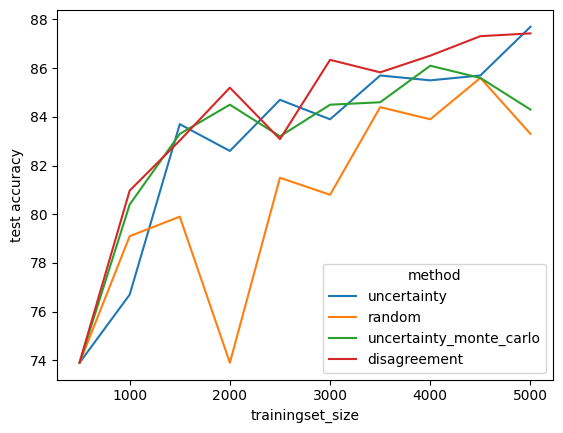

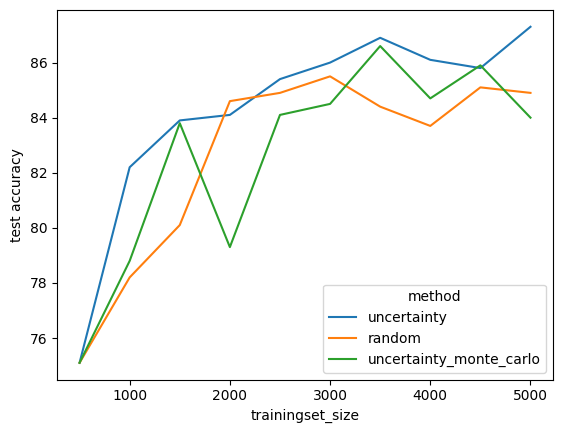

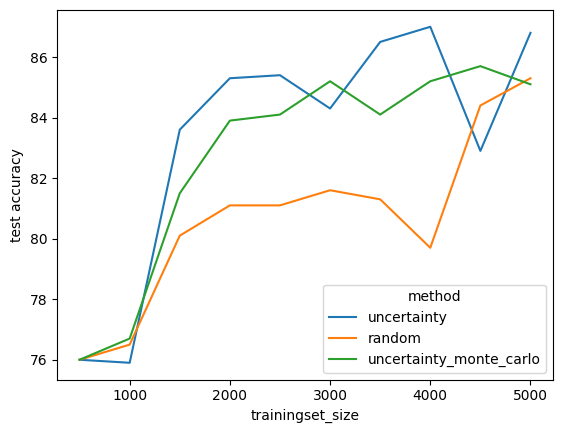

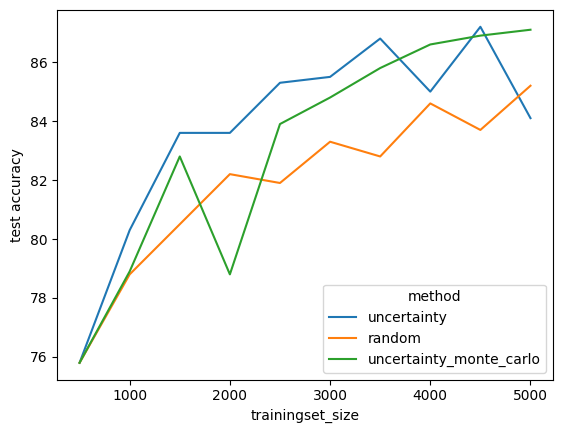

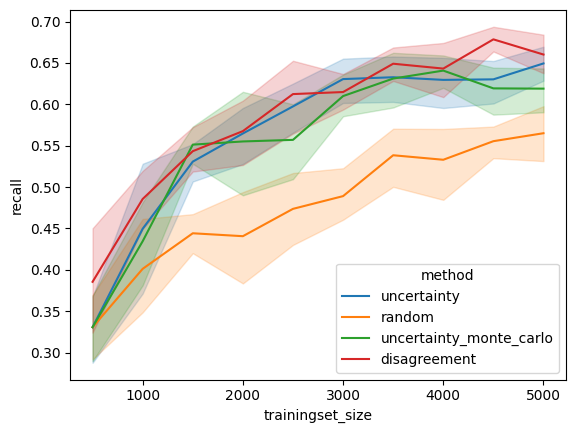

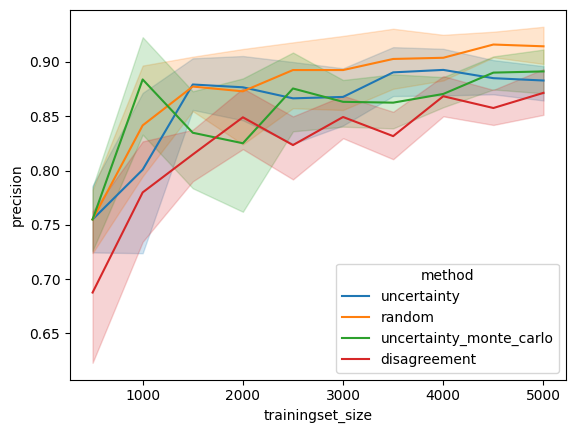

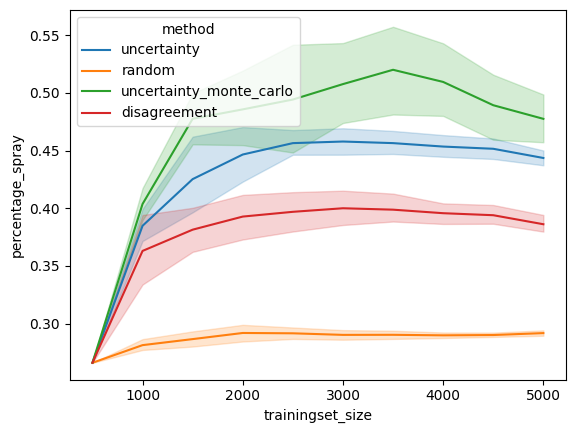

In [19]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']
#df = pd.concat([df[df['method'] == 'random'], df[df['type'] == 'active learning_no_weight']])
#df=df[df['method'] == 'random']
#df=df[df['type'] == 'active learning_no_weight']

sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
plt.show()
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method")
    plt.show()

#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")

plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method")
plt.show()

# Influence preprocessing

## Masking vs pixel remapping

## Crop remap interpolation

Procedure:

* Crop rectangle in frame
* Remap pixels in trapezoid to square

Check influence of interpolation type during remap on the accuracy

# Influence input resolution